In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (16512, 8)
Testing shape: (4128, 8)


In [17]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

In [18]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [19]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the results
print("Linear Regression Performance:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

print("\nRandom Forest Regression Performance:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Linear Regression Performance:
Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508

Random Forest Regression Performance:
Mean Squared Error: 0.2553684927247781
R-squared: 0.8051230593157366


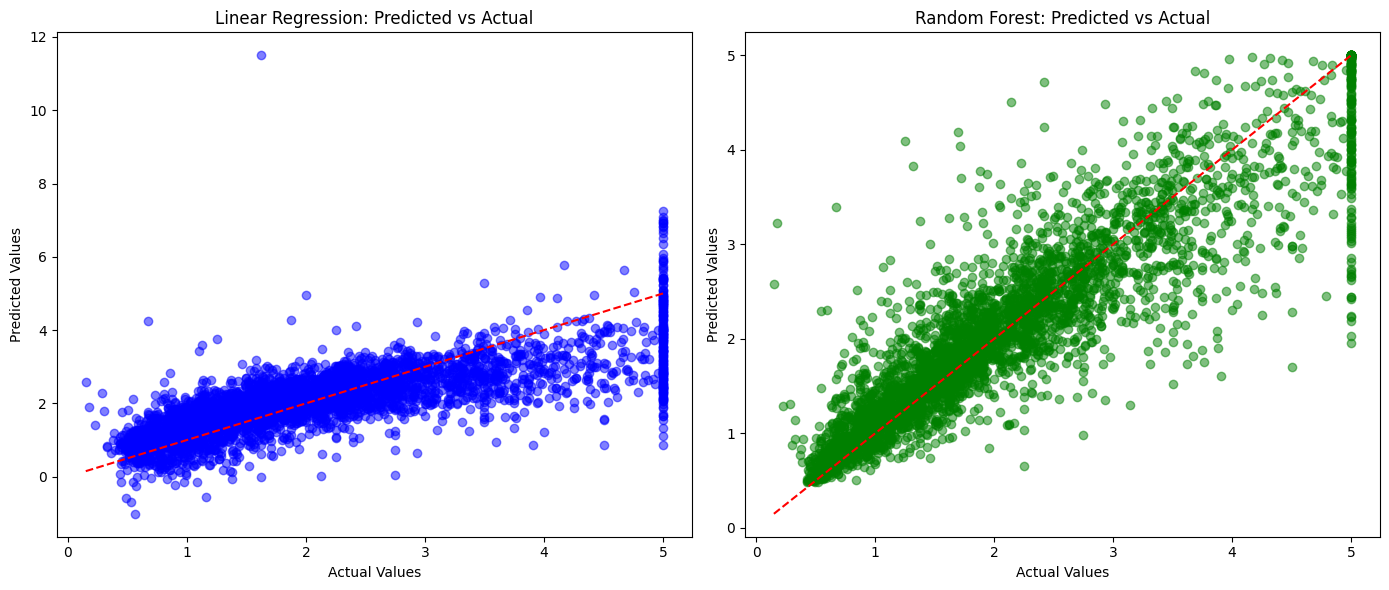

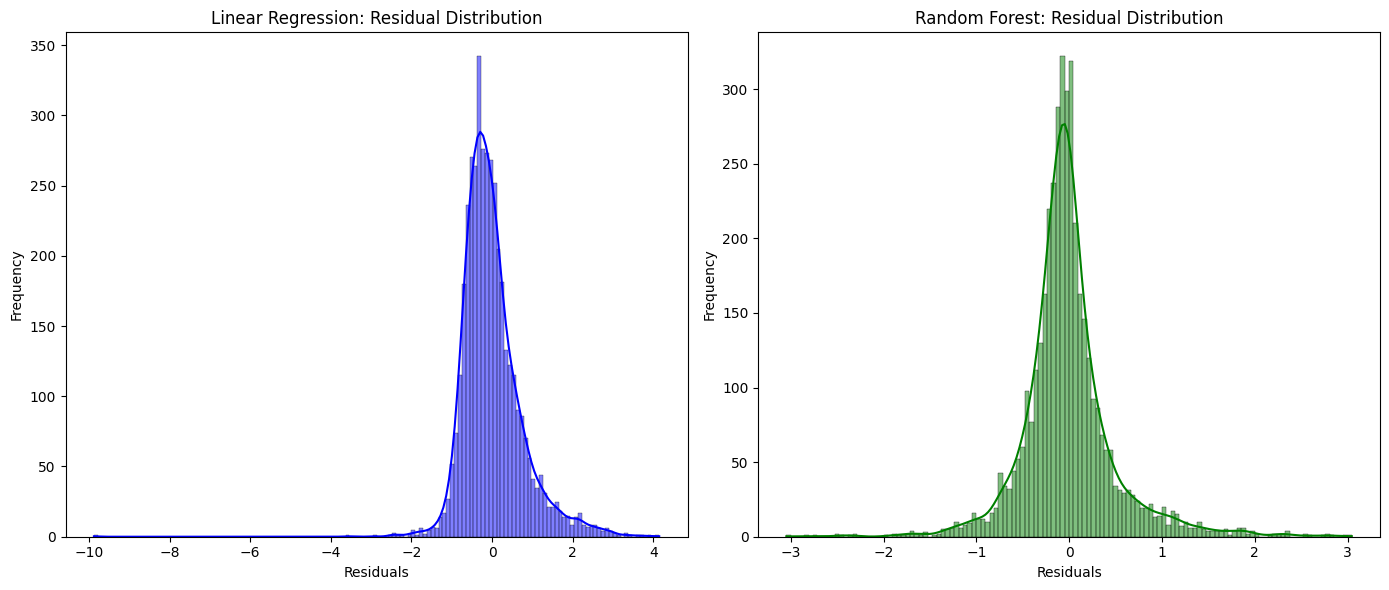

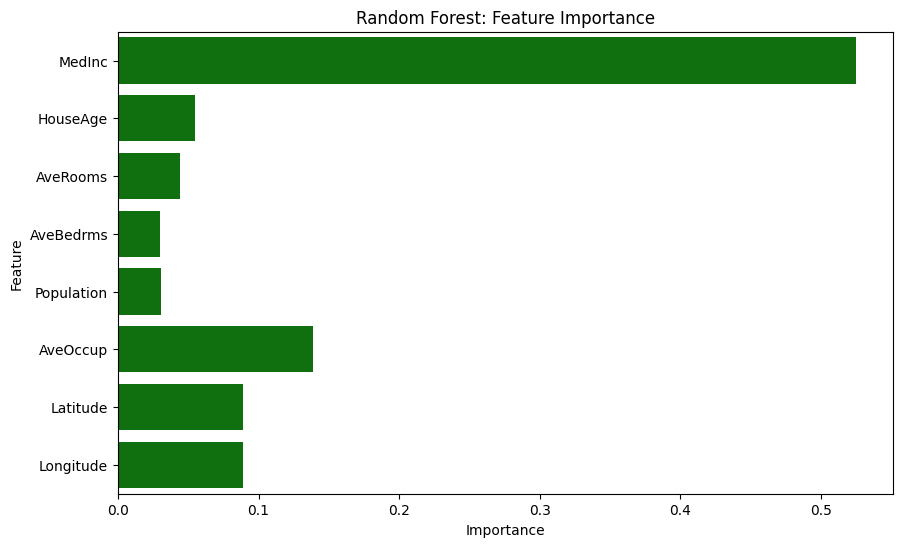

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs Actual values plot for both models
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predicted vs Actual")

# Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predicted vs Actual")

plt.tight_layout()
plt.show()

# Residual Plot for both models
plt.figure(figsize=(14, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
residuals_linear = y_test - y_pred_linear
sns.histplot(residuals_linear, kde=True, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Linear Regression: Residual Distribution")

# Random Forest Residuals
plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_rf
sns.histplot(residuals_rf, kde=True, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Random Forest: Residual Distribution")

plt.tight_layout()
plt.show()

# Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
importances = random_forest.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features, color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest: Feature Importance")
plt.show()